In [1]:
import numpy as np
import pyarrow as pa
import pandas as pd
import scipy as sp
import matplotlib
import seaborn as sns
import plotly as px
import sklearn as sk
import torch, torchvision, torchaudio
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("./training_1.csv", encoding='cp949')

In [3]:
df.head()

,,,,,,,,,,"lot;""wafer"";""x"";""y"";""ring"";""spot"";""trend"";""twospots"";""crescent"";""ring_pure"";""spot_pure"";""trend_pure"";""twospots_pure"";""crescent_pure"""
Lot_1;1;1;67;0,0332031730845769;6,48519201883132e-05;0,312294593060493;0,0390430665764935;0,00771987128577758;0,0325758284622229;6,54906689829159e-10;0,285687707722175;0,0395706499953045;-4,0.000843
Lot_1;1;1;68;0,0328173889580282;-4,66246954348572e-06;0,288024790081015;0,0405631417212302;0,00263633379698886;0,0327267641746118;8,76695244240241e-10;0,281496623060313;0,0404069156343969;-5,0.000076
Lot_1;1;1;69;0,0333211682053133;2,47580311665707e-05;0,261521426704379;0,0416022202035901;-0,000592417759195467;0,0328494417424522;1,16997736424868e-09;0,277305538398452;0,0411276544095511;-5,0.000290
Lot_1;1;1;70;0,0327066816529719;-1,41399015151066e-05;0,290740671081819;0,0408216721611609;0,00851014186519874;0,0329476626926438;1,55655995468072e-09;0,27311445373659;0,0417415065091455;-5,0.000561
Lot_1;1;1;71;0,0322198997669195;-4,85927969955997e-05;0,256578203050804;0,0425262452353082;0,00965410898796004;0,0330250576117472;2,06449498345691e-09;0,268923369074728;0,0422581887990589;-5,0.000767


data ;로 구분

In [4]:
df=pd.read_csv("./training_1.csv", encoding='cp949', sep=';')

In [5]:
df.head()

,lot,wafer,x,y,ring,spot,trend,twospots,crescent,ring_pure,spot_pure,trend_pure,twospots_pure,crescent_pure
0,Lot_1,1,1,67,"0,0332031730845769","6,48519201883132e-05","0,312294593060493","0,0390430665764935","0,00771987128577758","0,0325758284622229","6,54906689829159e-10","0,285687707722175","0,0395706499953045","-4,84314598172959e-17"
1,Lot_1,1,1,68,"0,0328173889580282","-4,66246954348572e-06","0,288024790081015","0,0405631417212302","0,00263633379698886","0,0327267641746118","8,76695244240241e-10","0,281496623060313","0,0404069156343969","-5,07606418493978e-17"
2,Lot_1,1,1,69,"0,0333211682053133","2,47580311665707e-05","0,261521426704379","0,0416022202035901","-0,000592417759195467","0,0328494417424522","1,16997736424868e-09","0,277305538398452","0,0411276544095511","-5,29028513056874e-17"
3,Lot_1,1,1,70,"0,0327066816529719","-1,41399015151066e-05","0,290740671081819","0,0408216721611609","0,00851014186519874","0,0329476626926438","1,55655995468072e-09","0,27311445373659","0,0417415065091455","-5,56129609519792e-17"
4,Lot_1,1,1,71,"0,0322198997669195","-4,85927969955997e-05","0,256578203050804","0,0425262452353082","0,00965410898796004","0,0330250576117472","2,06449498345691e-09","0,268923369074728","0,0422581887990589","-5,76665485366261e-17"


In [6]:
#소수점 , -> .

In [7]:
num_col = ["ring", "spot", "trend", "twospots", "crescent", "ring_pure", "spot_pure", "trend_pure", "twospots_pure", "crescent_pure"]
for idx in num_col:
    df[idx] = df[idx].str.replace(',', '.')

In [8]:
df[idx]

0          -4.84314598172959e-17
1          -5.07606418493978e-17
2          -5.29028513056874e-17
3          -5.56129609519792e-17
4          -5.76665485366261e-17
                   ...          
3501795        0.282738885015506
3501796        0.282030083344059
3501797        0.281119548989083
3501798        0.280008722749403
3501799        0.278699367352337
Name: crescent_pure, Length: 3501800, dtype: object

In [ ]:
#str type float으로 변환

In [9]:
for idx in num_col:
    df[idx] = pd.to_numeric(df[idx])

In [10]:
df[idx]

0         -4.843146e-17
1         -5.076064e-17
2         -5.290285e-17
3         -5.561296e-17
4         -5.766655e-17
               ...     
3501795    2.827389e-01
3501796    2.820301e-01
3501797    2.811195e-01
3501798    2.800087e-01
3501799    2.786994e-01
Name: crescent_pure, Length: 3501800, dtype: float64

<Axes: >

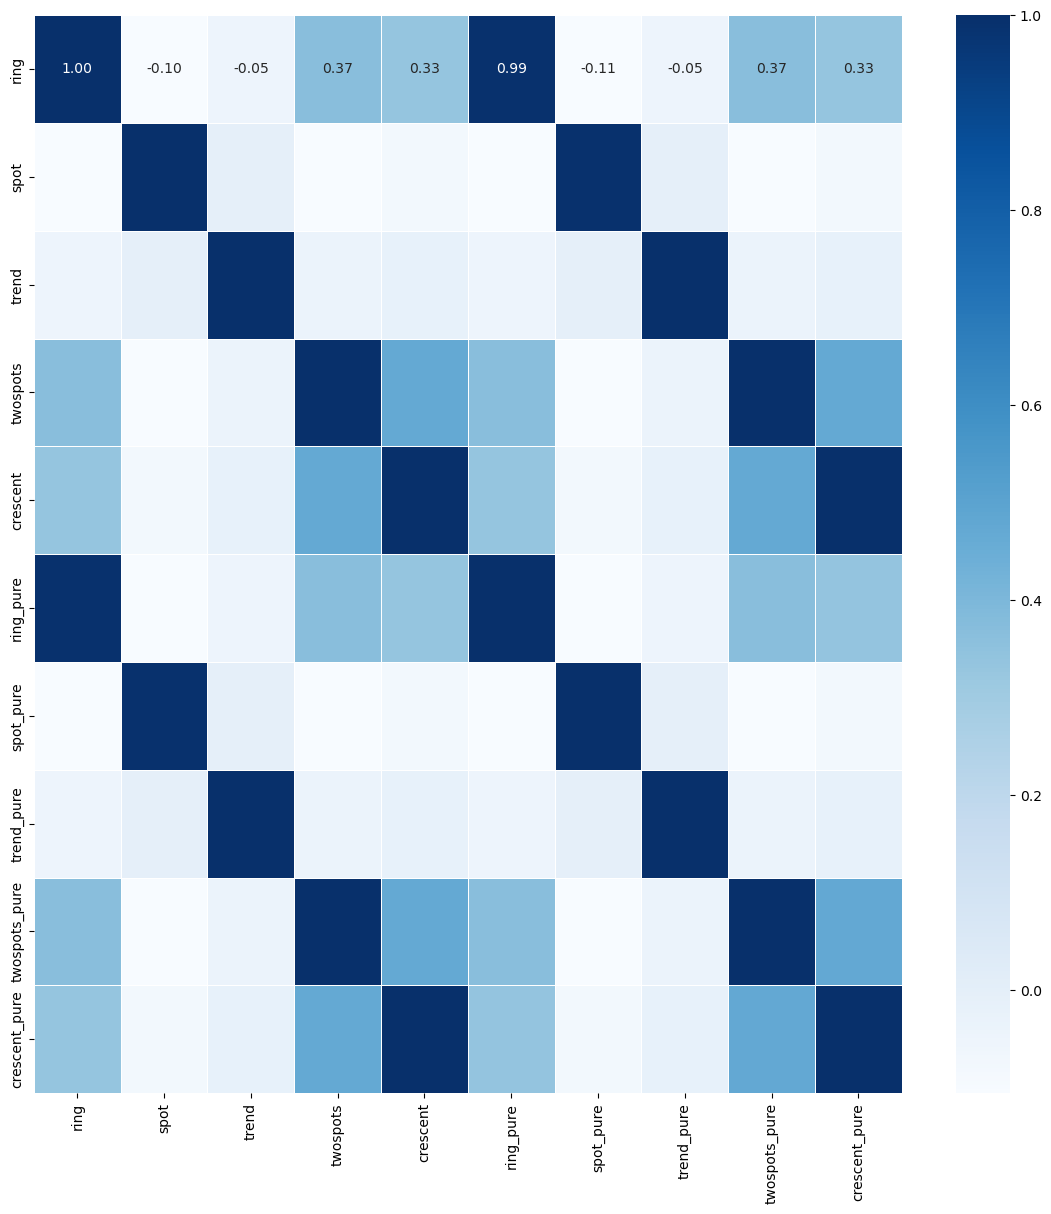

In [11]:
plt.figure(figsize=(14,14))
sns.heatmap(data = df[num_col].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [19]:
df["wafer"] = pd.to_numeric(df["wafer"])
df["x"] = pd.to_numeric(df["x"])
df["y"] = pd.to_numeric(df["y"])

In [20]:
df_mini = df[df["wafer"]<50]

In [21]:
df_mini

,lot,wafer,x,y,ring,spot,trend,twospots,crescent,ring_pure,spot_pure,trend_pure,twospots_pure,crescent_pure
0,Lot_1,1,1,67,0.033203,0.000065,0.312295,0.039043,0.007720,0.032576,6.549067e-10,0.285688,0.039571,-4.843146e-17
1,Lot_1,1,1,68,0.032817,-0.000005,0.288025,0.040563,0.002636,0.032727,8.766952e-10,0.281497,0.040407,-5.076064e-17
2,Lot_1,1,1,69,0.033321,0.000025,0.261521,0.041602,-0.000592,0.032849,1.169977e-09,0.277306,0.041128,-5.290285e-17
3,Lot_1,1,1,70,0.032707,-0.000014,0.290741,0.040822,0.008510,0.032948,1.556560e-09,0.273114,0.041742,-5.561296e-17
4,Lot_1,1,1,71,0.032220,-0.000049,0.256578,0.042526,0.009654,0.033025,2.064495e-09,0.268923,0.042258,-5.766655e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857936,Lot_1,49,115,100,0.024625,-0.000094,0.197004,0.022885,0.524380,0.024836,8.810708e-10,0.147382,0.022864,5.131738e-01
857937,Lot_1,49,115,101,0.024893,0.000010,0.118453,0.022553,0.514129,0.024826,7.928243e-10,0.143191,0.022820,5.090796e-01
857938,Lot_1,49,115,102,0.024245,0.000039,0.145935,0.022924,0.496344,0.024813,7.109521e-10,0.139000,0.022764,5.040493e-01
857939,Lot_1,49,115,103,0.025645,0.000057,0.151450,0.023187,0.467626,0.024797,6.353324e-10,0.134809,0.022697,4.982636e-01


In [22]:
df_mini.to_csv("train_data.csv")

In [33]:
df_mini.groupby("wafer")["x"].min()

wafer
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: x, dtype: int64

In [34]:
df_mini.groupby("wafer")["x"].max()

wafer
1     115
2     115
3     115
4     115
5     115
6     115
7     115
8     115
9     115
10    115
11    115
12    115
13    115
14    115
15    115
16    115
17    115
18    115
19    115
20    115
21    115
22    115
23    115
24    115
25    115
26    115
27    115
28    115
29    115
30    115
31    115
32    115
33    115
34    115
35    115
36    115
37    115
38    115
39    115
40    115
41    115
42    115
43    115
44    115
45    115
46    115
47    115
48    115
49    115
Name: x, dtype: int64

In [35]:
df_mini.groupby("wafer")["y"].min()

wafer
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: y, dtype: int64

In [36]:
df_mini.groupby("wafer")["y"].max()

wafer
1     193
2     193
3     193
4     193
5     193
6     193
7     193
8     193
9     193
10    193
11    193
12    193
13    193
14    193
15    193
16    193
17    193
18    193
19    193
20    193
21    193
22    193
23    193
24    193
25    193
26    193
27    193
28    193
29    193
30    193
31    193
32    193
33    193
34    193
35    193
36    193
37    193
38    193
39    193
40    193
41    193
42    193
43    193
44    193
45    193
46    193
47    193
48    193
49    193
Name: y, dtype: int64